In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.auto import tqdm
import math
import os
import random

In [2]:
file = "fruit_apple.jpg"
apple = cv.imread(file,cv.IMREAD_COLOR)

if apple is None : raise Exception("File not found")

In [3]:
from PIL import Image
def imshow(matrix):
    if len(matrix.shape)==3 : matrix = matrix[:,:,::-1]
    return Image.fromarray(matrix)

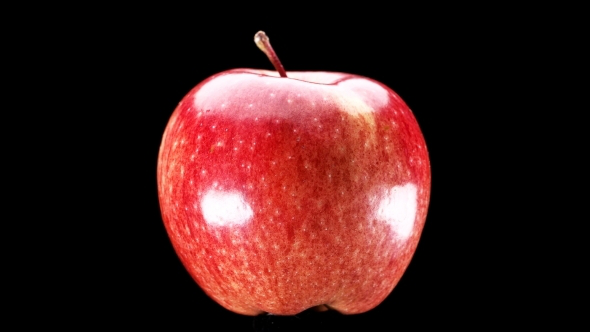

In [4]:
imshow(apple)

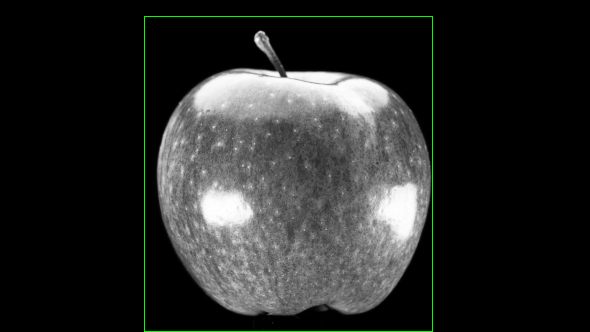

In [5]:
img = cv.imread(file, cv.IMREAD_GRAYSCALE)
positions = np.nonzero(img)

top = positions[0].min()
bottom = positions[0].max()
left = positions[1].min()
right = positions[1].max()

output = cv.rectangle(cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    , (left, top), (right, bottom), (0,255,0), 1)

imshow(output)

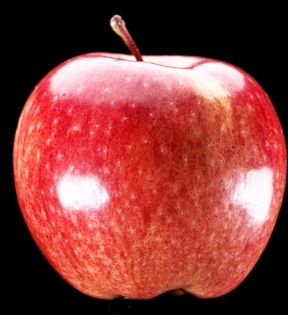

In [6]:
crop_apple = apple[top:bottom,left:right,:]
cv.imwrite("./light.jpg",crop_apple)
imshow(crop_apple)

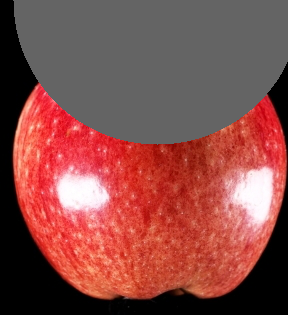

In [7]:
image = crop_apple.copy()
# Center coordinates
center_coordinates = (int(image.shape[0]/2),0)
 
# Radius of circle
radius = int(image.shape[1]/2)
  
# Blue color in BGR
color = (100, 100, 100)
  
# Line thickness of 2 px
thickness = -1

# Using cv2.circle() method
# Draw a circle with blue line borders of thickness of 2 px
image = cv.circle(image, center_coordinates, radius, color, thickness)
  
# Displaying the image
imshow(image)

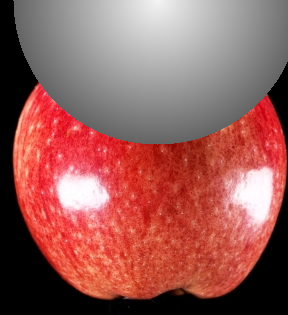

In [8]:
for i in range(radius):
    new_radius = radius - i
    new_color = (color[0] + i,color[1] + i,color[2] + i)
    image = cv.circle(image, center_coordinates, new_radius, new_color, thickness)
    
imshow(image)

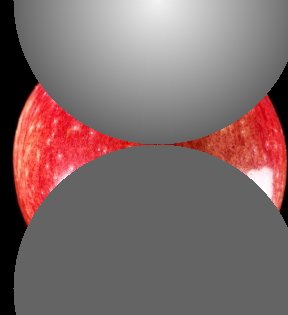

In [9]:
# Center coordinates
center_coordinates = (int(image.shape[0]/2),image.shape[1])
 
# Radius of circle
radius = int(image.shape[1]/2)
  
# Blue color in BGR
color = (100, 100, 100)
  
# Line thickness of 2 px
thickness = -1

# Using cv2.circle() method
# Draw a circle with blue line borders of thickness of 2 px
image = cv.circle(image, center_coordinates, radius, color, thickness)
  
# Displaying the image
imshow(image)

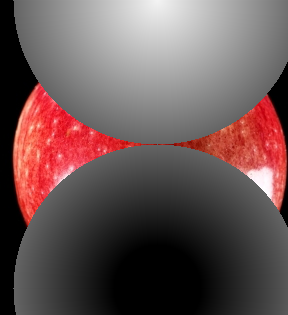

In [10]:
for i in range(radius):
    new_radius = radius - i
    new_color = (color[0] - i,color[1] - i,color[2] - i)
    image = cv.circle(image, center_coordinates, new_radius, new_color, thickness)
    
imshow(image)

In [11]:
def create_light(image,position="top"):
    import math
    import cv2 as cv
    
    x,y,_ = image.shape
    image = np.ones((x,y))*0.5
    # Center coordinates
    top = (int(y/2),0)
    left = (0,int(x/2))
    right = (y,int(x/2))
    bottom = (int(y/2),x)

    # Radius of circle
    radiusx = int(y/2)
    radiusy = int(x/2)
    radiusxy = int(math.sqrt(x**2 + y**2)/2)

    thickness = -1

    # Using cv2.circle() method
    # Draw a circle with blue line borders of thickness of 2 px
    if position == "top" :
        light = top
        dark = bottom
        radius = radiusy
    elif position == "left" :
        light = left
        dark = right
        radius = radiusx
    elif position == "right" :
        light = right
        dark = left
        radius = radiusx
    elif position == "bottom" :
        light = bottom
        dark = top
        radius = radiusy
    elif position == "top-left" :
        light = (0,0)
        dark = (x,y)
        radius = radiusxy
    elif position == "top-right" :
        light = (x,0)
        dark = (0,y)
        radius = radiusxy
    elif position == "bottom-left" :
        light = (0,y)
        dark = (x,0)
        radius = radiusxy
    elif position == "bottom-right" :
        light = (x,y)
        dark = (0,0)
        radius = radiusxy        
    else : raise Exception("Choose option between top, left, right, bottom, top-left, top-right, bottom-left, bottom-right")
    
    ran = np.arange(0,0.5,(0.5/radius))
    for i in range(radius):
        new_brightness = 0.5+ran[i]
        new_darkness = 0.5-ran[i]

        i+=1
        new_radius = radius-i
        image = cv.circle(image, light, new_radius, new_brightness, thickness)
        image = cv.circle(image, dark, new_radius, new_darkness, thickness)

    return image

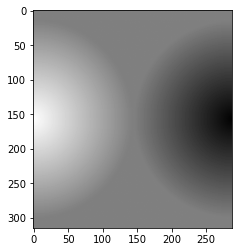

In [12]:
light = create_light(crop_apple,"left")
plt.figure()
plt.imshow(light, cmap='gray',clim=(0,1))

In [50]:
def create_light_v2(image,position):
    import math
    import cv2 as cv
    
    x,y,_ = image.shape
    image = np.ones((x,y))*0
    # Center coordinates
    light = np.asarray(position)
    dark = np.asarray([x,y]) - position

    # Radius of circle
    p = 9
    d = 16
    light_radius = int(math.sqrt( (light[0]-dark[0])**2+(light[1]-dark[1])**2)/d )*p
#     dark_radius = int(math.sqrt( (light[0]-dark[0])**2+(light[1]-dark[1])**2) )
    dark_radius = int(math.sqrt( (x-0)**2+(y-0)**2))
    thickness = -1
    
    ran = np.arange(0,0.5,(0.5/radius))
    
    for i in range(radius):
        new_brightness = 0.5+ran[i]
        new_darkness = 0+ran[i]
        new_light_radius = light_radius-i
        new_dark_radius = dark_radius-i
        if new_dark_radius <= 0 : new_dark_radius=0

        image = cv.circle(image, tuple(light), new_light_radius, new_brightness, thickness)
        image = cv.circle(image, tuple(light), new_dark_radius, new_darkness, thickness)
        
    for i in range(radius):
            new_brightness = 0.5+ran[i]
            new_darkness = 0+ran[i]
            new_light_radius = light_radius-i
            new_dark_radius = dark_radius-i
            if new_dark_radius <= 0 : new_dark_radius=0

            image = cv.circle(image, tuple(light), new_light_radius, new_brightness, thickness)

    return image

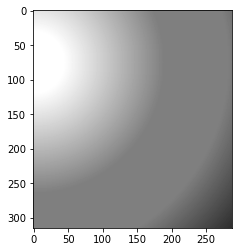

In [51]:
x,y,_ = crop_apple.shape
light = create_light_v2(crop_apple,[0,75])
plt.figure()
plt.imshow(light, cmap='gray',clim=(0,1))

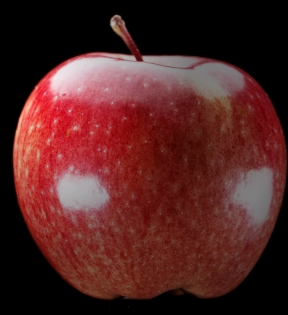

In [52]:
def add_parallel_light(image, mask):
    
    frame = image.copy()
    height, width, _ = frame.shape
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    adjust = 255- np.max(hsv[:,:,2])
    hsv[:,:,2] = hsv[:,:,2]+adjust
    hsv[:, :, 2] = hsv[:, :, 2]*mask
    hsv[hsv>255] = 255
    hsv[hsv<0] = 0
   
    frame = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    frame = np.asarray(frame, dtype=np.uint8)
    return frame.astype(np.uint8)

enlighted = add_parallel_light(crop_apple,light)

imshow(enlighted)

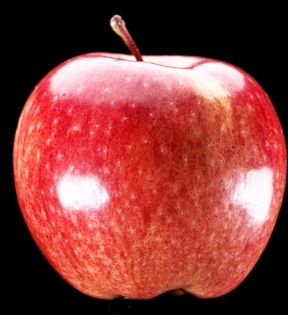

In [49]:
imshow(crop_apple)